In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import re  # Import the regular expressions module

In [2]:
data_dir = '.' # Set the directory where your .npy files are located
model_data = {} # Dictionary to store training accuracy data for each model

for filename in os.listdir(data_dir): # Loop through all files in the directory
    model_match = re.match(pattern=r'(.+?)_train_(loss|acc)_lr(.+?)_e(\d+?).npy',
                           string=filename)

    if model_match:
        model_name = model_match.group(1)
        metric = model_match.group(2)
        lr_value = float(model_match.group(3))
        num_epochs = int(model_match.group(4)) + 1

        data = np.load(os.path.join(data_dir, filename)) # Load the data from the .npy file

        # Store the data in the model_data dictionary
        if model_name not in model_data:
            model_data[model_name] = {}
        if metric not in model_data[model_name]:
            model_data[model_name][metric] = {}
        if lr_value not in model_data[model_name][metric]:
            model_data[model_name][metric][lr_value] = {}

        model_data[model_name][metric][lr_value][num_epochs] = data[-1]

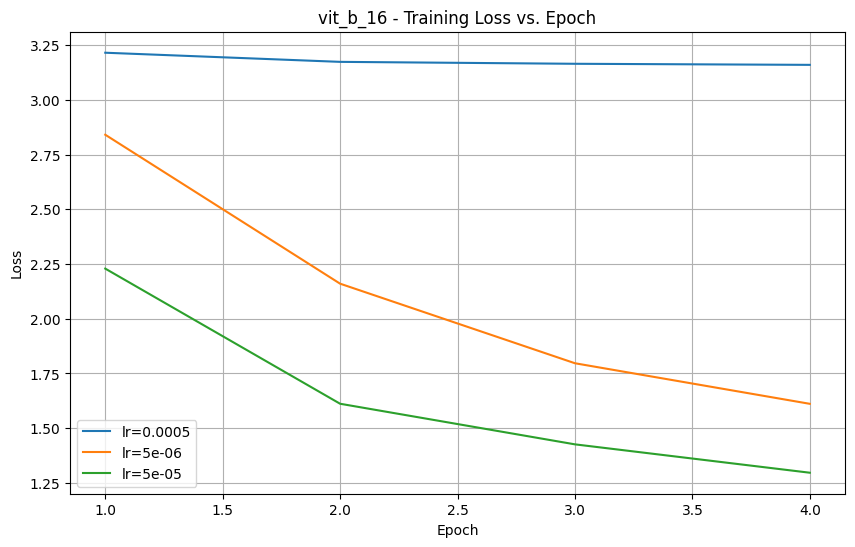

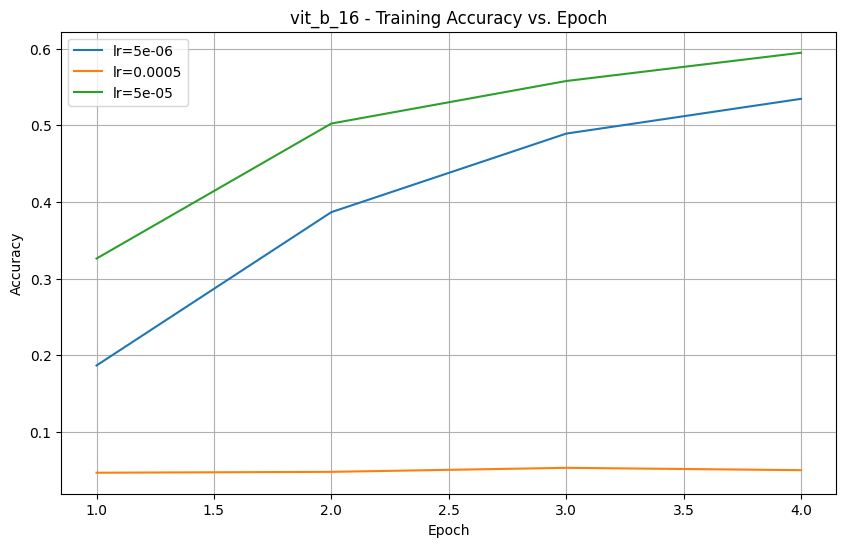

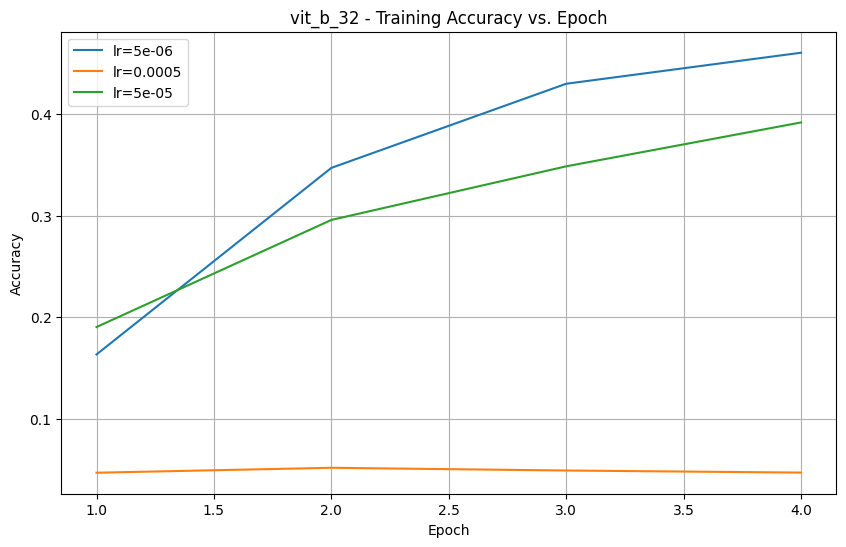

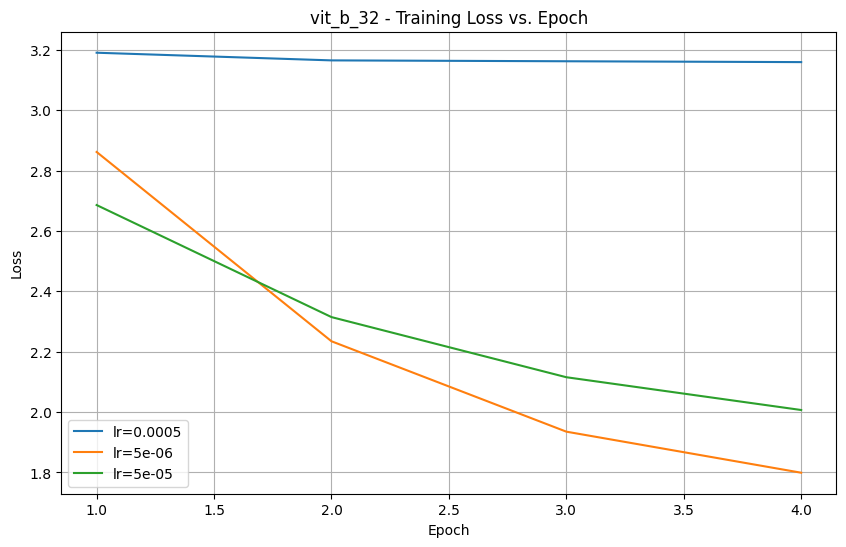

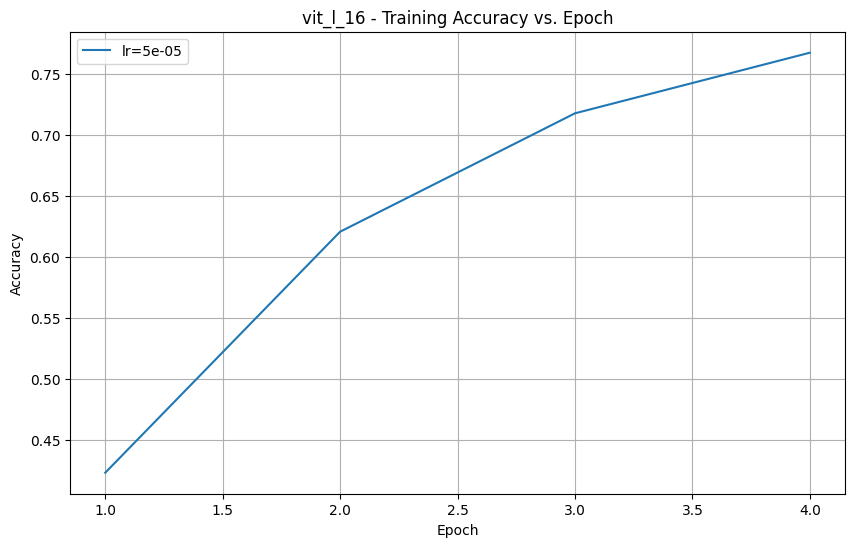

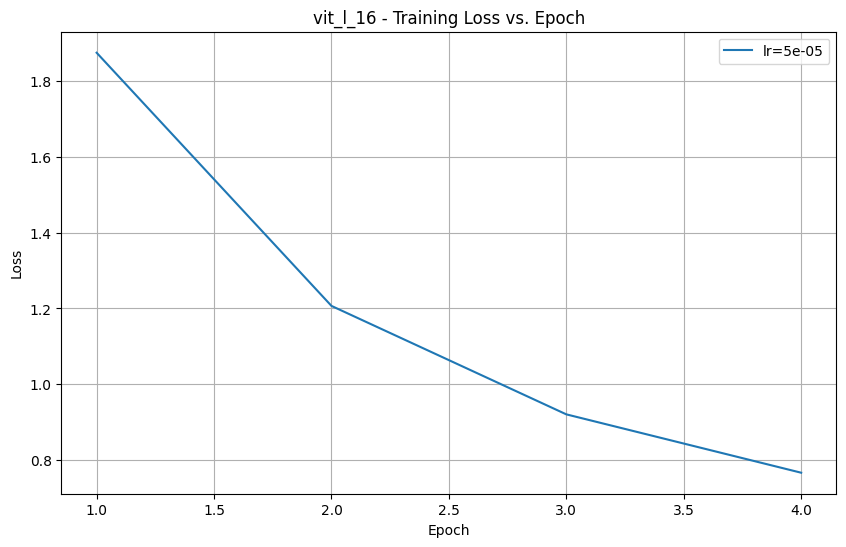

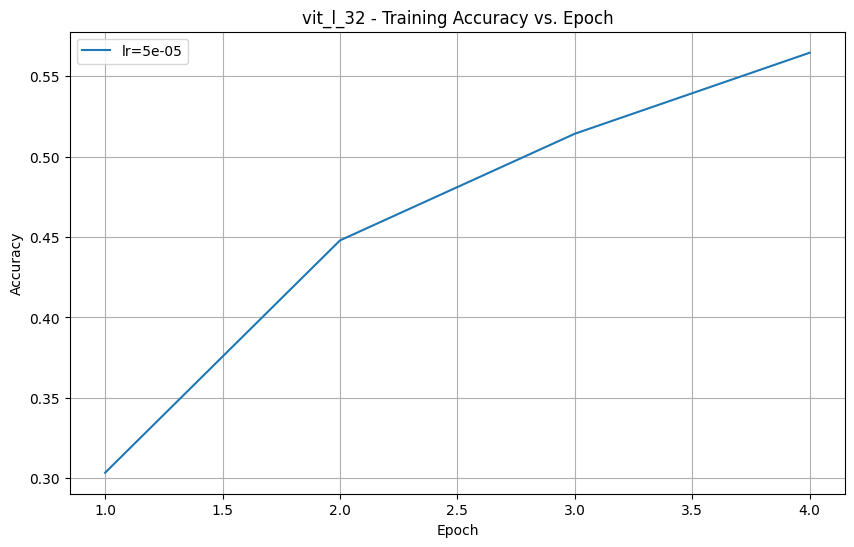

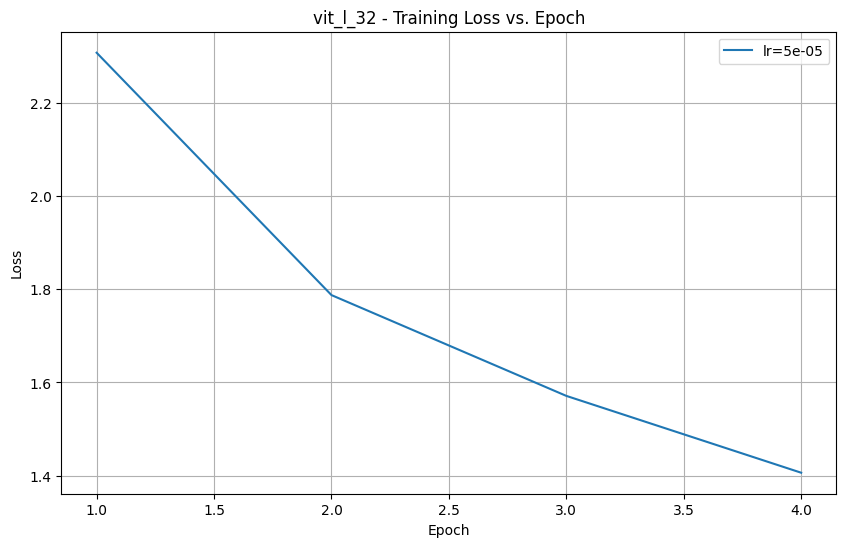

In [3]:
# Now, create plots for training accuracy vs. epoch for each model
for model_name, model_metrics in model_data.items():
    for metric, lr_data in model_metrics.items():

        plt.figure(figsize=(10, 6))
        metric = 'Accuracy' if metric == 'acc' else 'Loss'
        plt.title(f"{model_name} - Training {metric} vs. Epoch")
        plt.xlabel('Epoch')
        plt.ylabel(metric)

        for lr_value, epoch_data in lr_data.items():
            # Sort the data based on the number of epochs
            sorted_epoch_data = sorted(epoch_data.items())
            epochs, accuracies = zip(*sorted_epoch_data)
            plt.plot(epochs, accuracies, label=f'lr={lr_value}')

        plt.legend()
        plt.grid()
        plt.show()